# Customer Churn Prediction  
*By Ali Mtulu Funda*

Customer churn is a significant challenge for telecom companies. Churn occurs when customers leave one telecom provider for another. Here's why it matters and what telecom companies can do about it.

**Why Does Churn Happen?**

Churn can occur for many reasons, but some of the most common are:

1. Poor Service Quality: If customers experience frequent dropped calls, slow internet, or other technical issues, they might switch providers.

2. Better Deals Elsewhere: Customers often switch if they find better rates or packages with other providers.

3. Bad Customer Service: Unfriendly or unhelpful customer service can drive customers away.

4. Lack of New Features: If a provider doesn't keep up with the latest technology, customers may look elsewhere.

**Why Is Churn a Problem?**

When customers leave, it costs telecom companies money to replace them. It's much cheaper to keep an existing customer than to attract a new one. Churn also affects a company's reputation—if too many people leave, it suggests the provider isn't meeting customers' needs.

**Objective**

I aim to predict customer churn in the Telco dataset by thoroughly analyzing the data to understand why customers are leaving. I will explore and compare multiple models, including XGBoost, LSTM, RNN, and Neural Network, to identify the best-performing one based on metrics such as accuracy, precision, recall, and F1 score. This will help me select the most suitable model for the project requirements.

**About Dataset**

Context: "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content: Each row represents a customer, and each column contains customer attributes described in the column metadata.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

By analyzing these, we can potentially spot which customers may leave the service.

**NOW it is time to jump to coding. Starting by Import All necessary Libraries**

# Customer Churn Prediction  
*By Ali Mtulu Funda*

Customer churn is a significant challenge for telecom companies. Churn occurs when customers leave one telecom provider for another. Here's why it matters and what telecom companies can do about it.

**Why Does Churn Happen?**

Churn can occur for many reasons, but some of the most common are:

1. Poor Service Quality: If customers experience frequent dropped calls, slow internet, or other technical issues, they might switch providers.

2. Better Deals Elsewhere: Customers often switch if they find better rates or packages with other providers.

3. Bad Customer Service: Unfriendly or unhelpful customer service can drive customers away.

4. Lack of New Features: If a provider doesn't keep up with the latest technology, customers may look elsewhere.

**Why Is Churn a Problem?**

When customers leave, it costs telecom companies money to replace them. It's much cheaper to keep an existing customer than to attract a new one. Churn also affects a company's reputation—if too many people leave, it suggests the provider isn't meeting customers' needs.

**Objective**

I aim to predict customer churn in the Telco dataset by thoroughly analyzing the data to understand why customers are leaving. I will explore and compare multiple models, including XGBoost, LSTM, RNN, and Neural Network, to identify the best-performing one based on metrics such as accuracy, precision, recall, and F1 score. This will help me select the most suitable model for the project requirements.

**About Dataset**

Context: "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content: Each row represents a customer, and each column contains customer attributes described in the column metadata.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

By analyzing these, we can potentially spot which customers may leave the service.

**NOW it is time to jump to coding. Starting by Import All necessary Libraries**

In [ ]:
%%capture
pip install iterative-stratification


In [ ]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_auc_score, make_scorer
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn import set_config
import optuna
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pprint import pprint
from sklearn.metrics import classification_report


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Importing Data**
importing data and perfom initial check for datatype and any missing values

In [ ]:
df = pd.read_csv('C:/Users/hp/Desktop/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'Number of rows and columns: {df.shape}')

df.head(10)

Number of rows and columns: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Let's now check for any null values in the dataset.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since there is only a tiny portion of the dataset that is null, it is important to remove them, as this will not greatly reduce or affect the dataset. I will also convert all the categorical columns into dummy variables and drop the customerID column.

In [ ]:
#drop customerID
df = df.iloc[:,1:]
# Convert 'TotalCharges' to numeric, handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


# Convert all categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


**Visualization**

To gain a quick understanding of the relationships within the dataset, I will create a correlation matrix plot. This plot will help us see how different variables in the dataset are related to each other. Positive relationships are shown in warmer colors (closer to 1), while negative relationships are in cooler colors (closer to -1). Values close to 0 indicate little to no relationship. This visualization will provide a clear picture of the dataset's internal dynamics, making it easier for anyone to grasp the underlying patterns and trends.

C:\Users\hp\AppData\Local\Temp\ipykernel_15776\2602997707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
C:\Users\hp\AppData\Local\Temp\ipykernel_15776\2602997707.py:11: UserWarning: 
The palette list has fewer values (4) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)


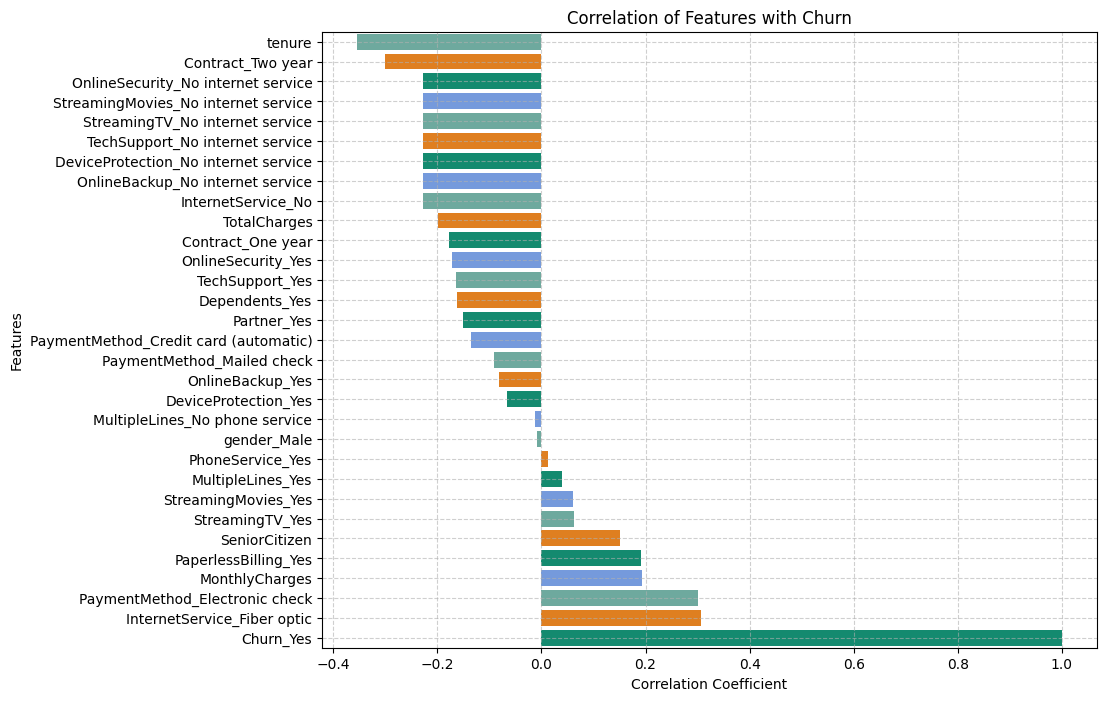

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values with respect to 'Churn_Yes' column
churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#64B3A4', '#FF7F00', '#009E79', '#6495ED']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


From the chart above, we can infer the following insights:

- Customers using fiber optic internet or electronic checks are more likely to cancel their service. This may be due to higher costs or billing issues associated with these payment methods.
- Customers opting for longer contract durations (one or two years) are less likely to churn. This indicates that longer contracts could be effective in retaining customers.
- Customers with additional tech services such as online security, tech support, or device protection are less likely to churn. This highlights the value of these services in customer retention.
- Older customers are more likely to churn. Tailoring services and communication strategies to meet the needs of older customers could help reduce churn rates.

Now, it is important to check distribution of numerical column towards churn.

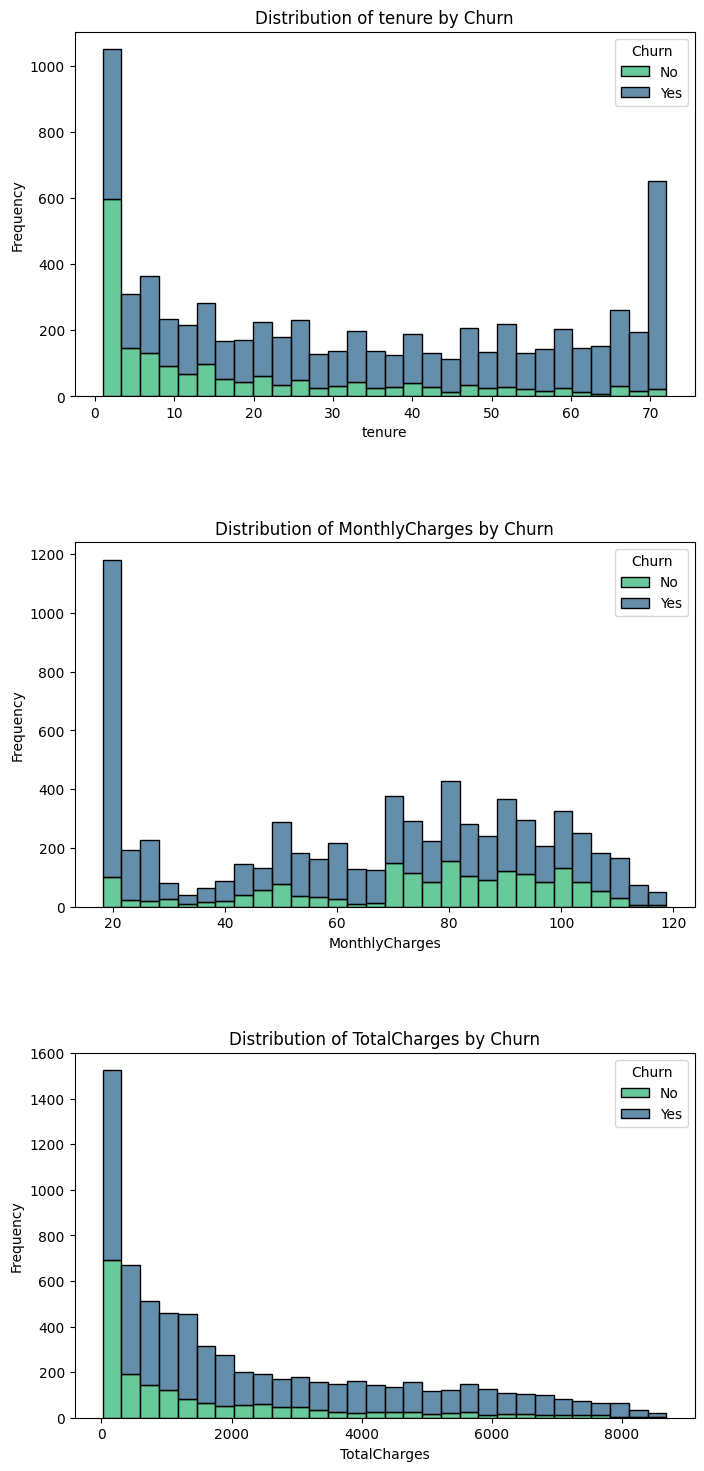

In [ ]:
# define NO of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

Next I will plot distribution for other important columns.

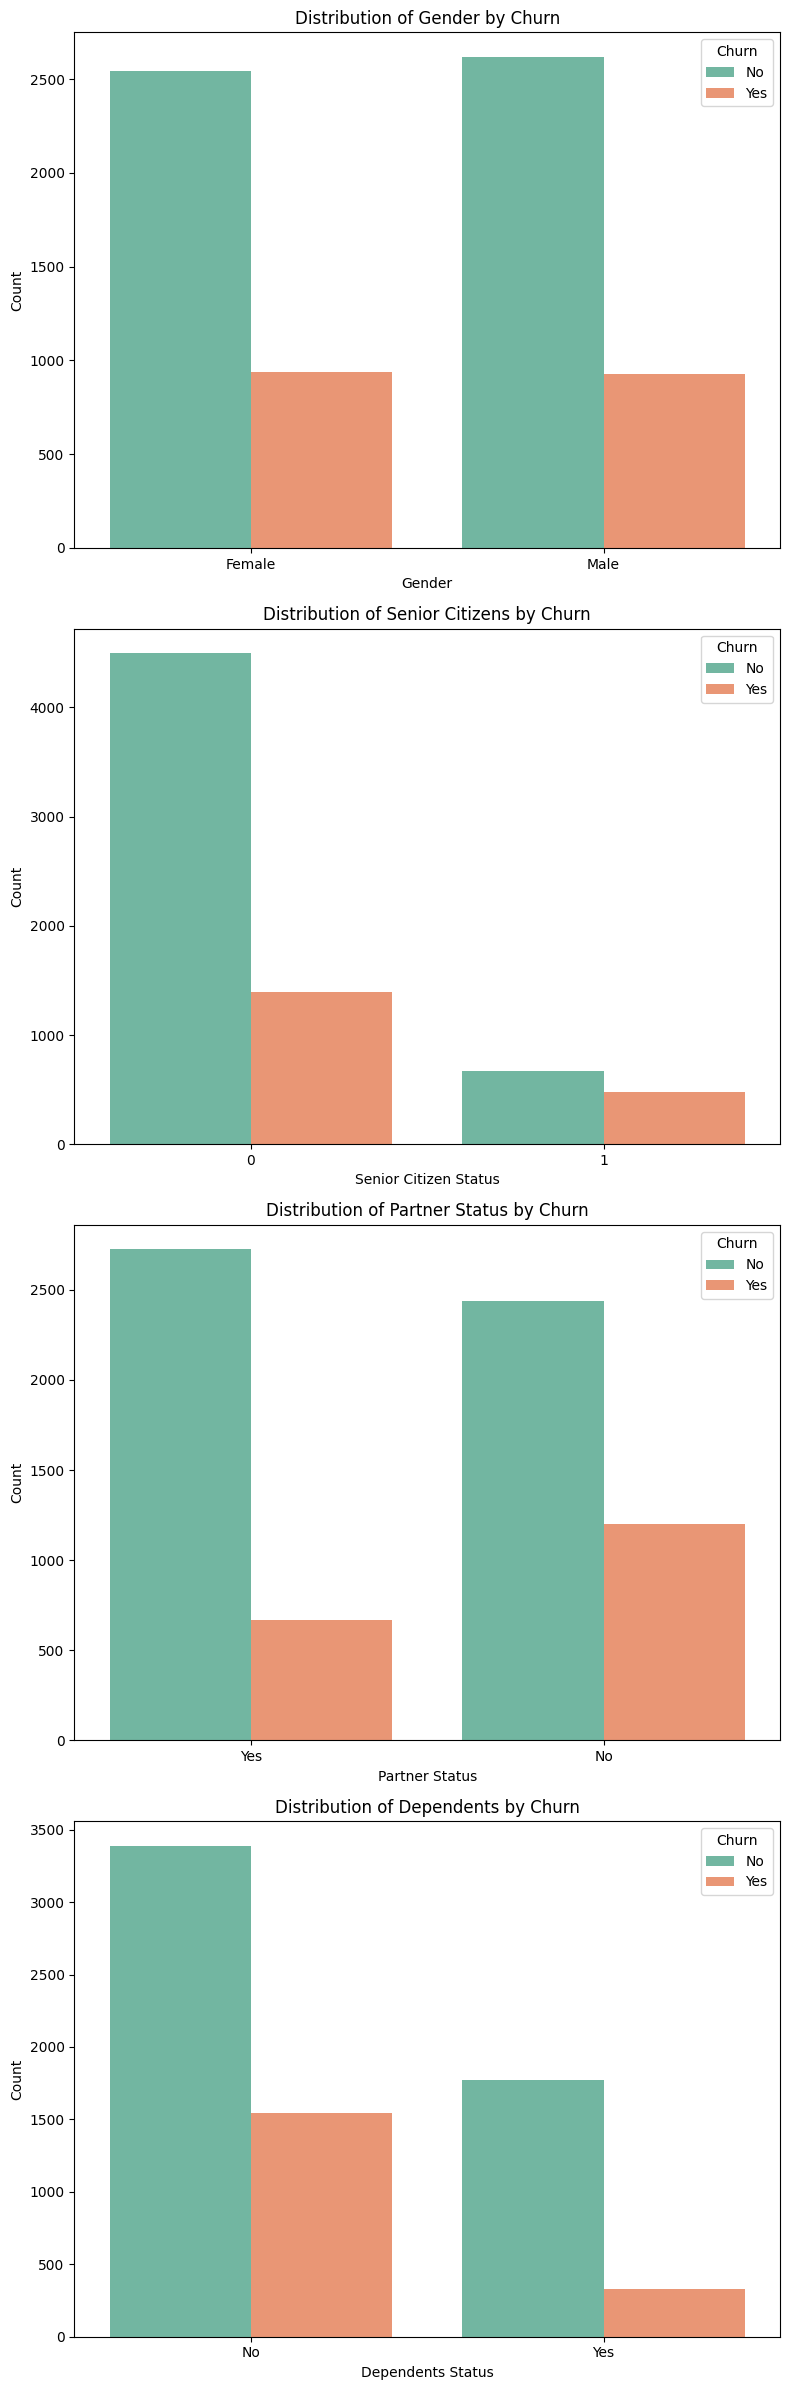

In [ ]:
# Nomber of plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
fig.subplots_adjust(hspace=0.5)

# Gender distribution by Churn
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Gender by Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', labels=['No', 'Yes'])

# Senior Citizen distribution by Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Senior Citizens by Churn')
axes[1].set_xlabel('Senior Citizen Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Partner distribution by Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of Partner Status by Churn')
axes[2].set_xlabel('Partner Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Churn', labels=['No', 'Yes'])

# Dependents distribution by Churn
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[3], palette='Set2')
axes[3].set_title('Distribution of Dependents by Churn')
axes[3].set_xlabel('Dependents Status')
axes[3].set_ylabel('Count')
axes[3].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Gender by Churn:

The churn rates appear  balanced between male and female customers, suggesting that gender does not have a significant impact on churn in this dataset.

Senior Citizen by Churn:

Senior citizens have a  higher churn rate compared to non-senior citizens. This could be due to different service needs, pricing sensitivity, or possibly dissatisfaction with the available offerings.

Partner Status by Churn:

Customers without partners tend to churn at a higher rate than those with partners. This might indicate that customers with partners have different needs or satisfaction levels, potentially influenced by shared decision-making or economic factors.

Dependents by Churn:

Customers without dependents seem to have a slightly higher churn rate compared to those with dependents. This could imply that customers with dependents may have more stable or family-oriented reasons for staying with the service provider.

Phone Service by Churn:

Interestingly, customers with phone service have a higher churn rate compared to those without phone service. This could be due to dissatisfaction with phone service quality or pricing, suggesting that the company may need to improve its phone service offerings.

Multiple Lines by Churn:

Customers with multiple lines have a higher churn rate than those with a single line. This could be because customers with multiple lines may be more tech-savvy or have higher service expectations, leading them to switch providers more often.

To further analyze the impact of certain features on customer churn, I plan to cluster the main columns of the dataset based on their relationship with churn. This analysis will build upon our previous correlation analysis, which highlighted features strongly correlated with churn. These features play a crucial role in determining whether customers decide to stay or leave.

The most impactful features identified from our analysis include:

- Tenure: The length of time a customer has been with the company.
- Monthly: The monthly charges incurred by the customer.
- Total: The total charges incurred by the customer.
- InternetService: The type of internet service subscribed to by the customer.
- Contract: The type of contract under which the customer is subscribed.
- PaymentMethod: The method of payment used by the customer.

By clustering these features, we aim to uncover patterns that can provide deeper insights into customer behavior and help us develop targeted strategies to reduce churn.

I will apply K-means clustering based on these impactful features to identify customer segments that might be at risk of churning.

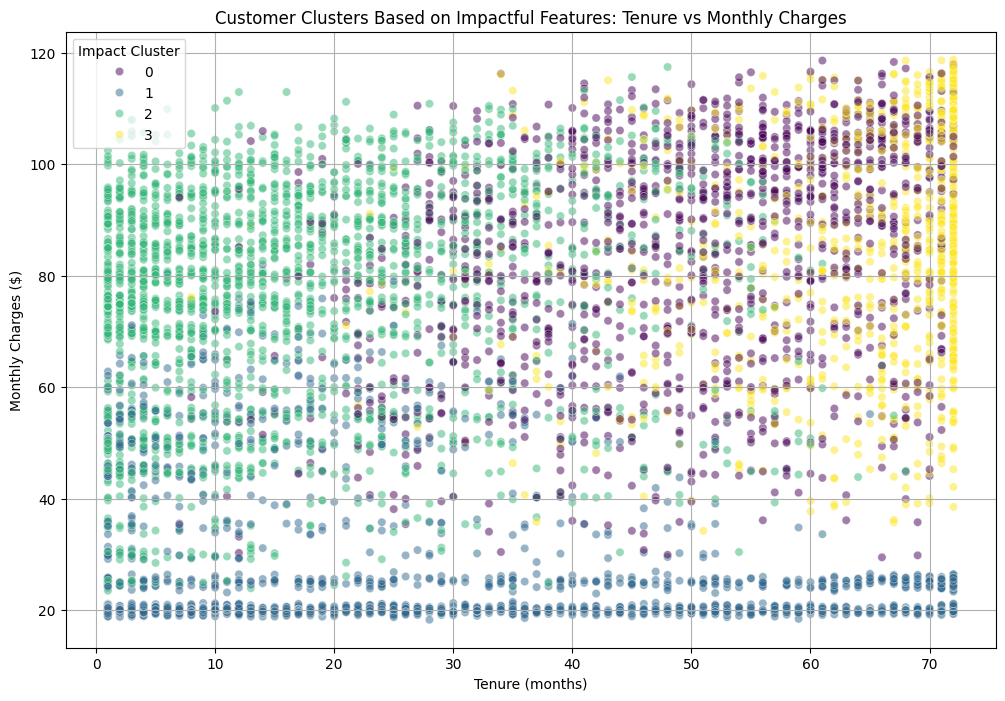

In [ ]:

# One-hot encoding the categorical columns
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
df['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=df, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()


Cluster 0 (light green): This segment includes customers with medium to high monthly charges and a range of tenure lengths. They might be heavy users of services or prefer higher-tier offerings.

Cluster 1 (purple): Customers in this cluster have higher monthly charges and longer tenures, suggesting they are loyal customers who may use premium services.

Cluster 2 (yellow): This cluster consists of customers with lower monthly charges and shorter tenures, indicating they are likely new customers or are more price-sensitive.

Cluster 3 (blue): Encompassing customers with lower to medium monthly charges and a broad range of tenure lengths, this cluster may represent a mixed segment with stable, yet budget-conscious customers.

I will creat a chart based on the number of churned versus non-churned customers in each clusters.

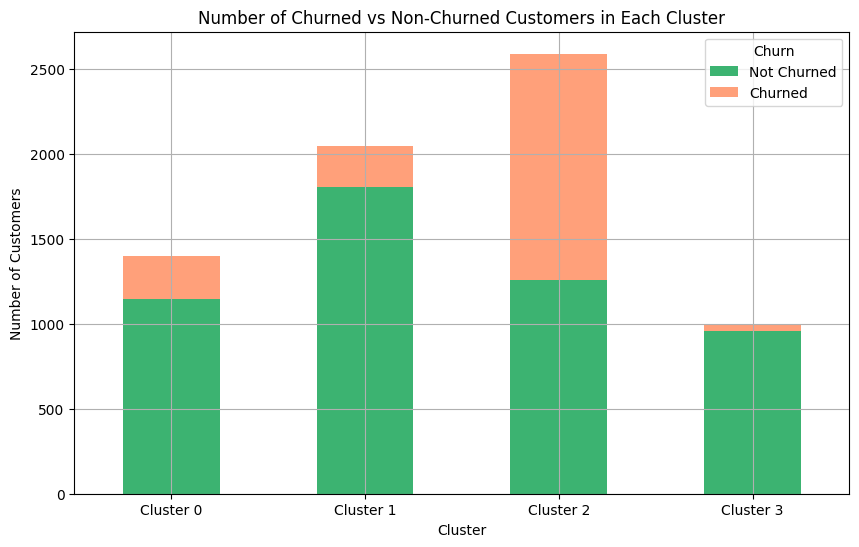

Churn,No,Yes
Impact_Cluster,,
0,1146,251
1,1803,244
2,1258,1331
3,956,43


In [ ]:
# Counting churned and non-churned customers in each cluster
churn_counts = df.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)

# Plotting the churn counts
churn_counts.plot(kind='bar', stacked=True, color=['mediumseagreen', 'lightsalmon'], figsize=(10, 6))
plt.title('Number of Churned vs Non-Churned Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(True)
plt.show()

churn_counts


**Summary of Findings:**

**Correlation and Distribution Analyses:**
- Customers with fiber optic internet tend to churn more, possibly due to unmet expectations regarding quality or price.
- Month-to-month contracts show higher churn rates, indicating customers find it easier to switch providers without long-term commitments.
- Higher monthly charges are associated with increased churn, suggesting customers are sensitive to pricing and competitive offers.
- Shorter tenure strongly correlates with churn, indicating new customers are more likely to leave, possibly due to initial dissatisfaction or better offers elsewhere.

**Cluster Analysis:**
- Clustering based on important features (tenure, monthly and total charges, service types, and payment methods) revealed distinct customer segments.
- Cluster 0: Balanced churn and retention, suggesting mixed satisfaction levels or service experiences.
- Cluster 1: High retention, indicating satisfaction with services or pricing, making them valuable for long-term growth strategies.
- Clusters 2 and 3: Moderate to low churn, suggesting these segments experience fair satisfaction but could benefit from targeted improvements or loyalty programs.

These insights can help develop targeted strategies to reduce churn and enhance overall customer satisfaction.

It seems like month-to-month contracts, the absence of online security, and the lack of tech support are positively correlated with churn, meaning that customers with these characteristics are more likely to leave. On the other hand, longer tenure and opting for two-year contracts are negatively correlated with churn, indicating that customers with these characteristics are less likely to leave.

Interestingly, services like online security, streaming TV, online backup, and tech support, which can be accessed offline, seem to have a negative relationship with churn. This suggests that customers who use these services are less likely to churn.

The green slice in the visualization represents the 27% of customers who have left the company. Our goal is to analyze the characteristics of these customers to understand why they left and identify patterns that can help reduce churn in the future.

**Preprocessing Data**

In [ ]:


categorical = df.select_dtypes("object")
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [ ]:
number = df.select_dtypes("number").reset_index(drop=True)
cate = pd.DataFrame(encoded.astype("int64"),columns=categorical.columns).reset_index(drop=True)
df = pd.concat([number,cate],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Impact_Cluster,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,2,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


**Modeling Using XGBoost**

In our dataset, we encounter a class imbalance issue where some categories have significantly fewer examples than others. This imbalance can hinder the model's ability to learn effectively, as it might prioritize the majority class and overlook patterns in the minority class. To address this, we employ a technique called Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic examples for the minority class, making the dataset more balanced and enhancing the model's ability to learn from all classes.

After balancing the dataset, we split it into training and testing sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data. This step ensures that the model generalizes well to new data and has not simply memorized the training examples.

We choose the XGBoost Classifier for its effectiveness in handling imbalanced datasets and its ability to capture complex relationships in the data. XGBoost is an implementation of gradient boosting that has shown excellent performance in a wide range of classification tasks.

Finally, we perform hyperparameter tuning to optimize the model's performance. Hyperparameters are settings that control the learning process of the model, such as the learning rate, tree depth, and regularization parameters. By systematically exploring different combinations of hyperparameters, we can find the best configuration that maximizes the model's performance metrics, such as accuracy, precision, recall, and F1 score. This helps us ensure that our model is achieving the best possible performance for our specific dataset and problem.

In [ ]:
# Split the dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values

# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  XGBoost classifier
xgb = XGBClassifier(verbosity=0)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}



# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_xgb.predict(X_test)




ROC-AUC Score: 0.8393530714393485


Let us calculate the performance metrics (accuracy, precision, recall, F1 score) for the XGBosst model 

In [ ]:
# Evaluate the model
Y_pred_xgb = final_xgb.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(Y_test, Y_pred_xgb))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score:", roc_auc)


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC-AUC Score: 0.8761424944685136


**Modeling Using Neural Network**

For the Neural Network model, we use the Keras library to define a deep learning model. The model consists of three main parts:

1. **Input Layer**: This layer receives the input data. It is configured to match the number of input features in our dataset.

2. **Hidden Layer**: This layer processes the input data, extracting relevant features. We can specify the number of neurons in this layer and the activation function, which controls the output of each neuron.

3. **Output Layer**: This layer produces the final output of the model. Since we are dealing with a binary classification task (churn or no churn), the output layer uses a sigmoid activation function, which squashes the output to a range between 0 and 1, representing the probability of churn.

To optimize the performance of the Neural Network, we use a wrapper class called `KerasClassifierWrapper`. This class allows us to use scikit-learn's `GridSearchCV` for hyperparameter tuning. Hyperparameters are settings that are not learned by the model but affect its learning process. We tune the following hyperparameters:

1. **Number of Neurons**: The number of neurons in the hidden layer.
2. **Activation Function**: The function used to introduce non-linearity into the model. Common choices include 'relu' (rectified linear unit) and 'tanh' (hyperbolic tangent).
3. **Optimizer**: The algorithm used to update the weights of the neural network during training. Examples include 'adam' and 'rmsprop'.
4. **Learning Rate**: The rate at which the model learns from the data. It controls the size of the updates to the weights.

By tuning these hyperparameters, we aim to find the configuration that maximizes the model's performance on our dataset, as measured by metrics like accuracy, precision, recall, and F1 score. This process helps us build a Neural Network model that can effectively predict customer churn.

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test)



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Let us calculate the performance metrics (accuracy, precision, recall, F1 score) for Keras Neural Network model

In [ ]:
Y_pred_nn = final_model.predict(X_test)
Y_pred_nn = (Y_pred_nn > 0.5).astype(int)
print("Keras Neural Network:")
print(classification_report(Y_test, Y_pred_nn))


roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for ANN Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Keras Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1037
           1       0.76      0.86      0.81      1029

    accuracy                           0.79      2066
   macro avg       0.80      0.80      0.79      2066
weighted avg       0.80      0.79      0.79      2066

ROC-AUC Score for ANN Model: 0.8761424944685136


**Modeling Using Recurrent Neural Network (RNN)**

For the RNN model, we follow these steps:

1. **Data Normalization**: We use min-max scaling to scale the input features to a range between 0 and 1. This ensures that all features contribute equally to the model training process.

2. **Reshaping Input Data**: RNNs expect input data in a specific shape (batch_size, timesteps, input_dim). We reshape the input data to fit this requirement, where 'batch_size' represents the number of samples in each batch, 'timesteps' is the number of time steps in each sample, and 'input_dim' is the number of features in each time step.

3. **Defining the RNN Model**: We define a Keras RNN model using the SimpleRNN layer. This layer is suitable for processing sequential data and includes a specified number of neurons and an activation function.

4. **Wrapper Class for GridSearchCV**: To use GridSearchCV for hyperparameter tuning, we implement a wrapper class called `KerasClassifierWrapper`. This class adapts the Keras RNN model to work with GridSearchCV, allowing us to tune hyperparameters such as the number of neurons, activation function, optimizer, and learning rate.

5. **Hyperparameter Tuning**: Using GridSearchCV, we search over a predefined grid of hyperparameters to find the best combination for our RNN model. Hyperparameters are settings that affect the learning process but are not learned from the data. By tuning these hyperparameters, we aim to optimize the model's performance on our dataset.

Overall, these steps help us build an RNN model that can effectively predict customer churn based on the provided dataset.

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize the input data
X_train_norm = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

# Reshape the input data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train_norm, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test_norm)
from sklearn.metrics import classification_report

# Assuming Y_test and Y_pred are the true labels and predicted labels, respectively, for your model
Y_pred_rnn = final_model.predict(X_test_norm)
Y_pred_rnn = (Y_pred_rnn > 0.5).astype(int)
print("RNN:")
print(classification_report(Y_test, Y_pred_rnn))


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
# Model Evaluation
Y_pred_rnn = final_model.predict(X_test_norm)
Y_pred_rnn = (Y_pred_rnn > 0.5).astype(int)
print("RNN:")
print(classification_report(Y_test, Y_pred_rnn))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for RNN Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RNN:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1037
           1       0.84      0.77      0.80      1029

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066

ROC-AUC Score for RNN Model: 0.8997008639521382


**Modeling Using Long Short-Term Memory (LSTM)**

For modeling using LSTM (Long Short-Term Memory) method, we follow a similar approach to the previous methods.

1. **Data Normalization**: We use min-max scaling to scale the input features to a range between 0 and 1, ensuring that all features contribute equally to the model training process.

2. **Reshaping Input Data**: LSTM models expect input data in a specific shape (batch_size, timesteps, input_dim). We reshape the input data to fit this requirement, where 'batch_size' represents the number of samples in each batch, 'timesteps' is the number of time steps in each sample, and 'input_dim' is the number of features in each time step.

3. **Defining the LSTM Model**: We define a Keras LSTM model with the LSTM layer. LSTM layers are well-suited for sequence prediction tasks due to their ability to retain information over long sequences. We specify the number of LSTM units (neurons) and an activation function for the layer.

4. **Wrapper Class for GridSearchCV**: Similar to the RNN approach, we implement a wrapper class called `KerasClassifierWrapper` to adapt the Keras LSTM model for use with GridSearchCV. This allows us to tune hyperparameters such as the number of LSTM units, activation function, optimizer, and learning rate.

5. **Hyperparameter Tuning**: Using GridSearchCV, we search over a predefined grid of hyperparameters to find the best combination for our LSTM model. Hyperparameters are settings that affect the learning process but are not learned from the data. By tuning these hyperparameters, we aim to optimize the model's performance on our dataset.

Overall, these steps help us build an LSTM model that can effectively predict customer churn based on the provided dataset.

In [ ]:

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
# Ensure TensorFlow is running on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize input data
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
X_train_norm = (X_train - min_val) / (max_val - min_val)
X_test_norm = (X_test - min_val) / (max_val - min_val)

# Reshape data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the Keras model
def create_model(neurons=50, dropout_rate=0.2, activation='relu', optimizer='adam', learn_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learn_rate), metrics=['accuracy'])
    return model

# Wrapper class for Keras model to use with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, neurons, dropout_rate, activation, optimizer, learn_rate):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.activation = activation
        self.optimizer = optimizer
        self.learn_rate = learn_rate

    def fit(self, X, y, **fit_params):
        self.model = create_model(self.neurons, self.dropout_rate, self.activation, self.optimizer, self.learn_rate)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Setup for GridSearchCV
param_grid = {
    'neurons': [50, 100],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learn_rate': [0.001, 0.01]
}
grid_search = GridSearchCV(estimator=KerasClassifierWrapper(50, 0.1, 'relu', 'adam', 0.01), param_grid=param_grid,
                           scoring=make_scorer(roc_auc_score), cv=3, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train, epochs=10, batch_size=10, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Get the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the final model
final_model = create_model(**grid_result.best_params_)
final_model.fit(X_train_norm, Y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
Y_pred = final_model.predict(X_test_norm)



Please install GPU version of TF
Please install GPU version of TF


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.838987 using {'activation': 'tanh', 'dropout_rate': 0.1, 'learn_rate': 0.01, 'neurons': 100, 'optimizer': 'rmsprop'}
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
#Evaluatiing the LSTM model
Y_pred_lstm = final_model.predict(X_test_norm)
Y_pred_lstm = (Y_pred_lstm > 0.5).astype(int)
print("LSTM:")
print(classification_report(Y_test, Y_pred_lstm))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for LSTM Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1037
           1       0.84      0.83      0.83      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC-AUC Score for LSTM Model: 0.9241125021437148


*Summary*

The project aimed to develop a predictive model to identify potential customer churn in a business. Several machine learning models were evaluated, including XGBoost Classifier, Keras Neural Network, Simple RNN, and LSTM, using a dataset that was preprocessed and balanced using SMOTE. 

The XGBoost Classifier achieved an accuracy of 0.84, with a precision, recall, and F1-score of 0.85, 0.83, and 0.84, respectively, for class 0, and 0.83, 0.85, and 0.84 for class 1. The ROC-AUC score was 0.8761.

The Keras Neural Network achieved an accuracy of 0.79, with a precision, recall, and F1-score of 0.84, 0.73, and 0.78, respectively, for class 0, and 0.76, 0.86, and 0.81 for class 1. The ROC-AUC score was also 0.8761.

The Simple RNN achieved an accuracy of 0.81, with a precision, recall, and F1-score of 0.79, 0.86, and 0.82, respectively, for class 0, and 0.84, 0.77, and 0.80 for class 1. The ROC-AUC score was 0.8997.

The LSTM achieved an accuracy of 0.84, with a precision, recall, and F1-score of 0.83, 0.84, and 0.84, respectively, for class 0, and 0.84, 0.83, and 0.83 for class 1. The ROC-AUC score was the highest at 0.9241.

Based on these results, the LSTM model was selected as the best-performing model for predicting customer churn. It demonstrated the highest ROC-AUC score and balanced performance across all evaluation metrics, making it the most suitable choice for the project.

In [1]:
%%capture
pip install iterative-stratification

In [2]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_auc_score, make_scorer
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn import set_config
import optuna
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pprint import pprint
from sklearn.metrics import classification_report


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Importing Data**
importing data and perfom initial check for datatype and any missing values

In [3]:
df = pd.read_csv('C:/Users/hp/Desktop/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'Number of rows and columns: {df.shape}')

df.head(10)

Number of rows and columns: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Let's now check for any null values in the dataset.

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since there is only a tiny portion of the dataset that is null, it is important to remove them, as this will not greatly reduce or affect the dataset. I will also convert all the categorical columns into dummy variables and drop the customerID column.

In [5]:
#drop customerID
df = df.iloc[:,1:]
# Convert 'TotalCharges' to numeric, handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


# Convert all categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


**Visualization**

To gain a quick understanding of the relationships within the dataset, I will create a correlation matrix plot. This plot will help us see how different variables in the dataset are related to each other. Positive relationships are shown in warmer colors (closer to 1), while negative relationships are in cooler colors (closer to -1). Values close to 0 indicate little to no relationship. This visualization will provide a clear picture of the dataset's internal dynamics, making it easier for anyone to grasp the underlying patterns and trends.

C:\Users\hp\AppData\Local\Temp\ipykernel_15776\2602997707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
C:\Users\hp\AppData\Local\Temp\ipykernel_15776\2602997707.py:11: UserWarning: 
The palette list has fewer values (4) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)


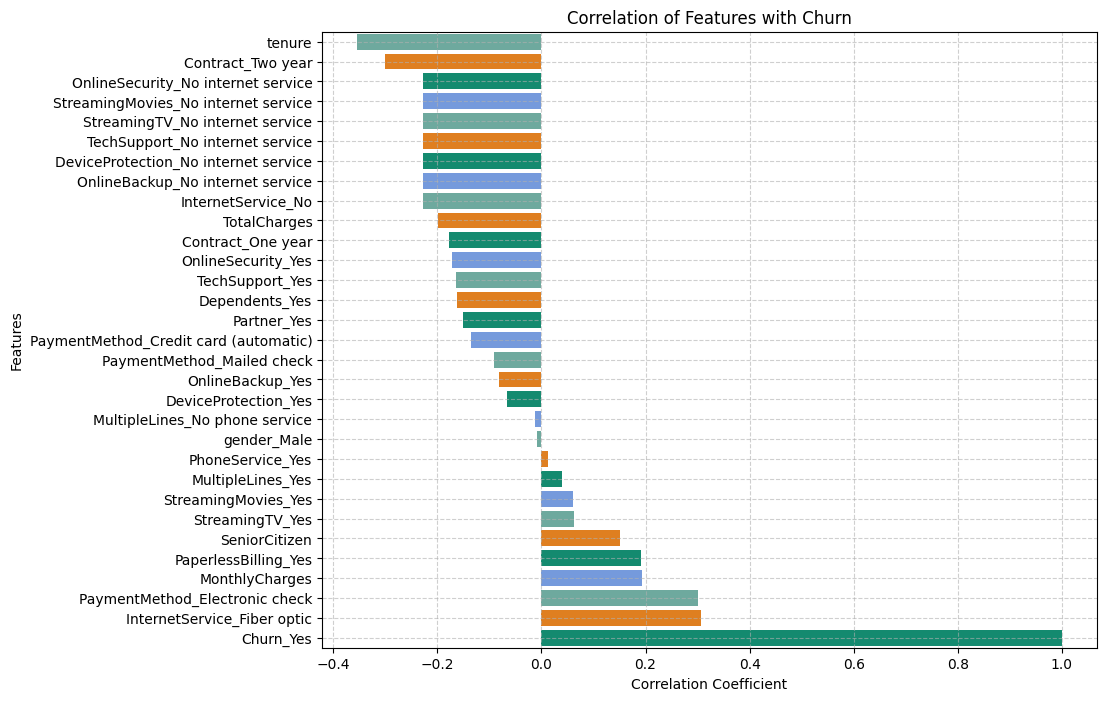

In [6]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values with respect to 'Churn_Yes' column
churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#64B3A4', '#FF7F00', '#009E79', '#6495ED']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


From the chart above, we can infer the following insights:

- Customers using fiber optic internet or electronic checks are more likely to cancel their service. This may be due to higher costs or billing issues associated with these payment methods.
- Customers opting for longer contract durations (one or two years) are less likely to churn. This indicates that longer contracts could be effective in retaining customers.
- Customers with additional tech services such as online security, tech support, or device protection are less likely to churn. This highlights the value of these services in customer retention.
- Older customers are more likely to churn. Tailoring services and communication strategies to meet the needs of older customers could help reduce churn rates.

Now, it is important to check distribution of numerical column towards churn.

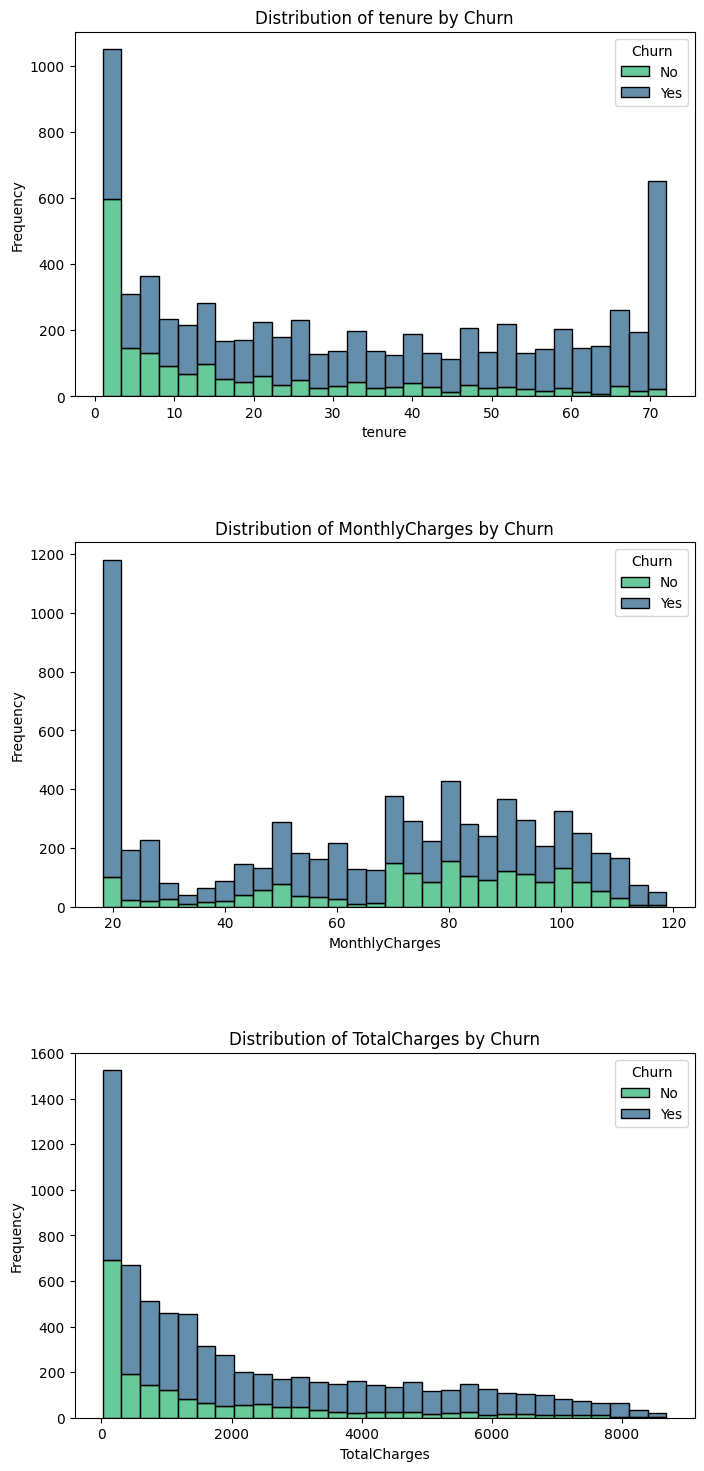

In [9]:
# define NO of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

Next I will plot distribution for other important columns.

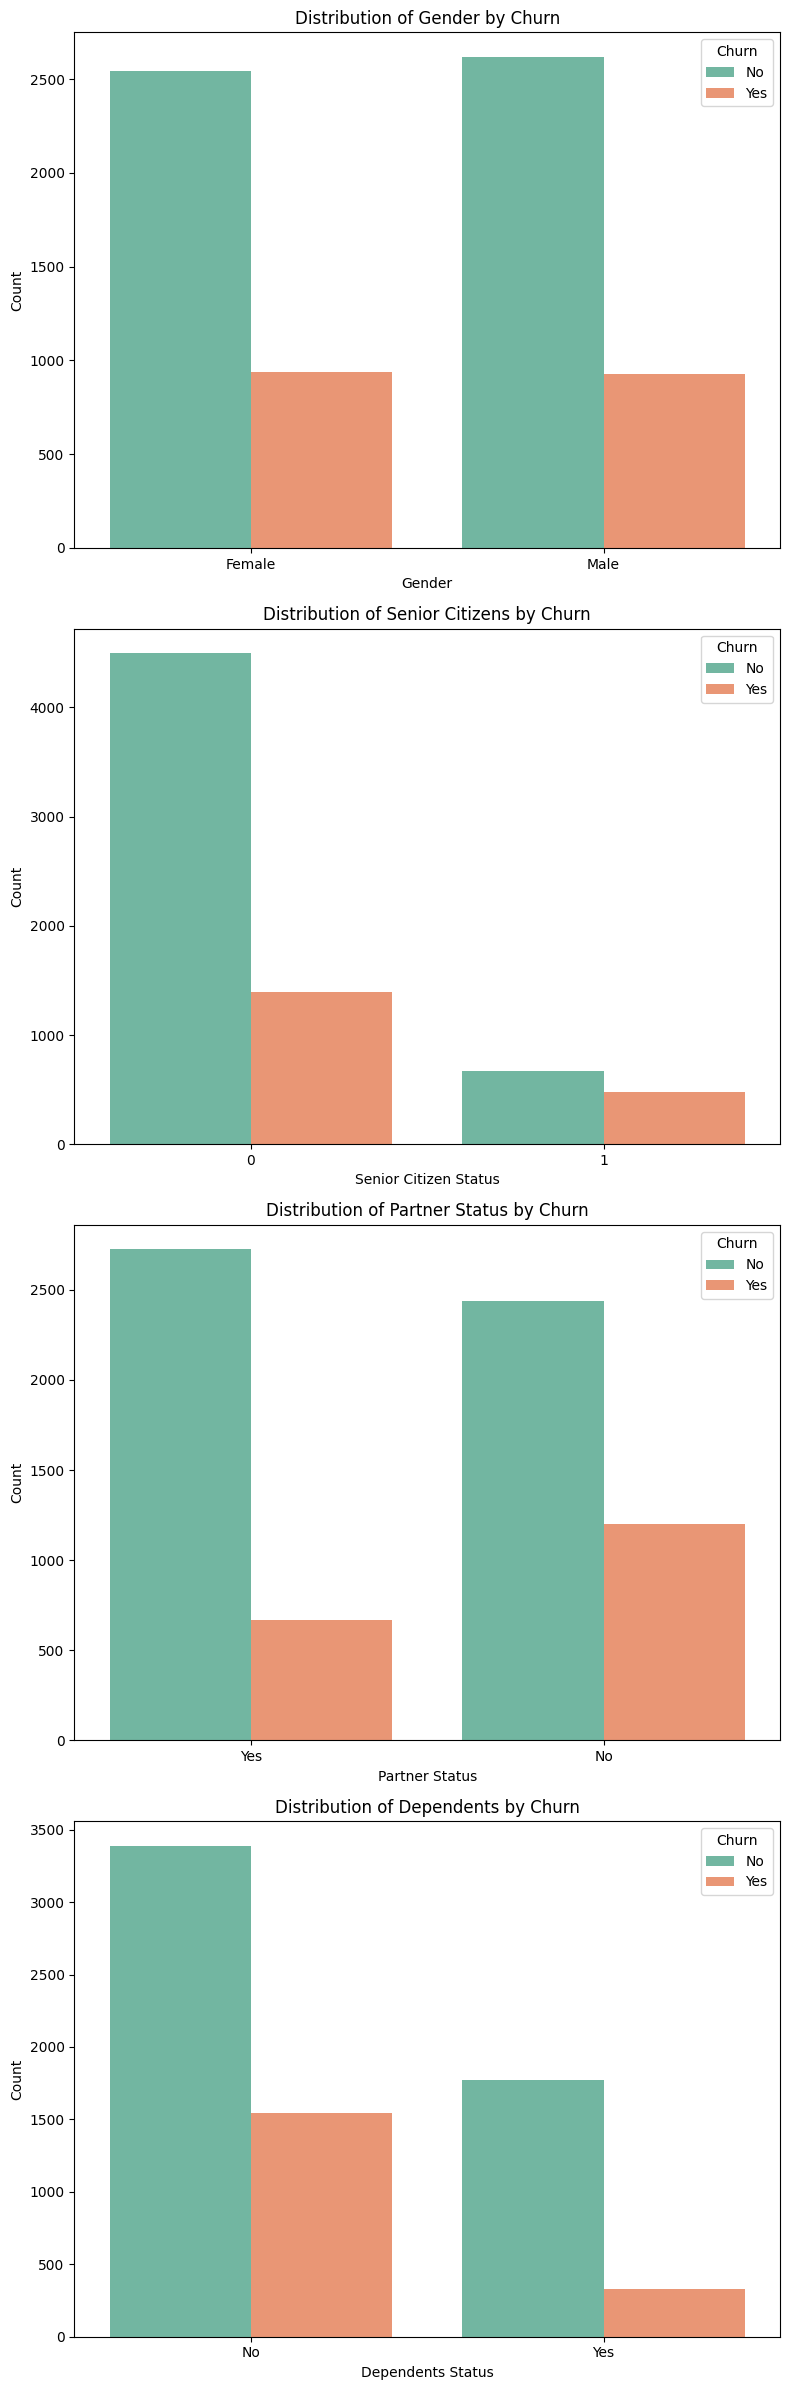

In [7]:
# Nomber of plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
fig.subplots_adjust(hspace=0.5)

# Gender distribution by Churn
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Gender by Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', labels=['No', 'Yes'])

# Senior Citizen distribution by Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Senior Citizens by Churn')
axes[1].set_xlabel('Senior Citizen Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Partner distribution by Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of Partner Status by Churn')
axes[2].set_xlabel('Partner Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Churn', labels=['No', 'Yes'])

# Dependents distribution by Churn
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[3], palette='Set2')
axes[3].set_title('Distribution of Dependents by Churn')
axes[3].set_xlabel('Dependents Status')
axes[3].set_ylabel('Count')
axes[3].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Gender by Churn:

The churn rates appear  balanced between male and female customers, suggesting that gender does not have a significant impact on churn in this dataset.

Senior Citizen by Churn:

Senior citizens have a  higher churn rate compared to non-senior citizens. This could be due to different service needs, pricing sensitivity, or possibly dissatisfaction with the available offerings.

Partner Status by Churn:

Customers without partners tend to churn at a higher rate than those with partners. This might indicate that customers with partners have different needs or satisfaction levels, potentially influenced by shared decision-making or economic factors.

Dependents by Churn:

Customers without dependents seem to have a slightly higher churn rate compared to those with dependents. This could imply that customers with dependents may have more stable or family-oriented reasons for staying with the service provider.

Phone Service by Churn:

Interestingly, customers with phone service have a higher churn rate compared to those without phone service. This could be due to dissatisfaction with phone service quality or pricing, suggesting that the company may need to improve its phone service offerings.

Multiple Lines by Churn:

Customers with multiple lines have a higher churn rate than those with a single line. This could be because customers with multiple lines may be more tech-savvy or have higher service expectations, leading them to switch providers more often.

To further analyze the impact of certain features on customer churn, I plan to cluster the main columns of the dataset based on their relationship with churn. This analysis will build upon our previous correlation analysis, which highlighted features strongly correlated with churn. These features play a crucial role in determining whether customers decide to stay or leave.

The most impactful features identified from our analysis include:

- Tenure: The length of time a customer has been with the company.
- Monthly: The monthly charges incurred by the customer.
- Total: The total charges incurred by the customer.
- InternetService: The type of internet service subscribed to by the customer.
- Contract: The type of contract under which the customer is subscribed.
- PaymentMethod: The method of payment used by the customer.

By clustering these features, we aim to uncover patterns that can provide deeper insights into customer behavior and help us develop targeted strategies to reduce churn.

I will apply K-means clustering based on these impactful features to identify customer segments that might be at risk of churning.

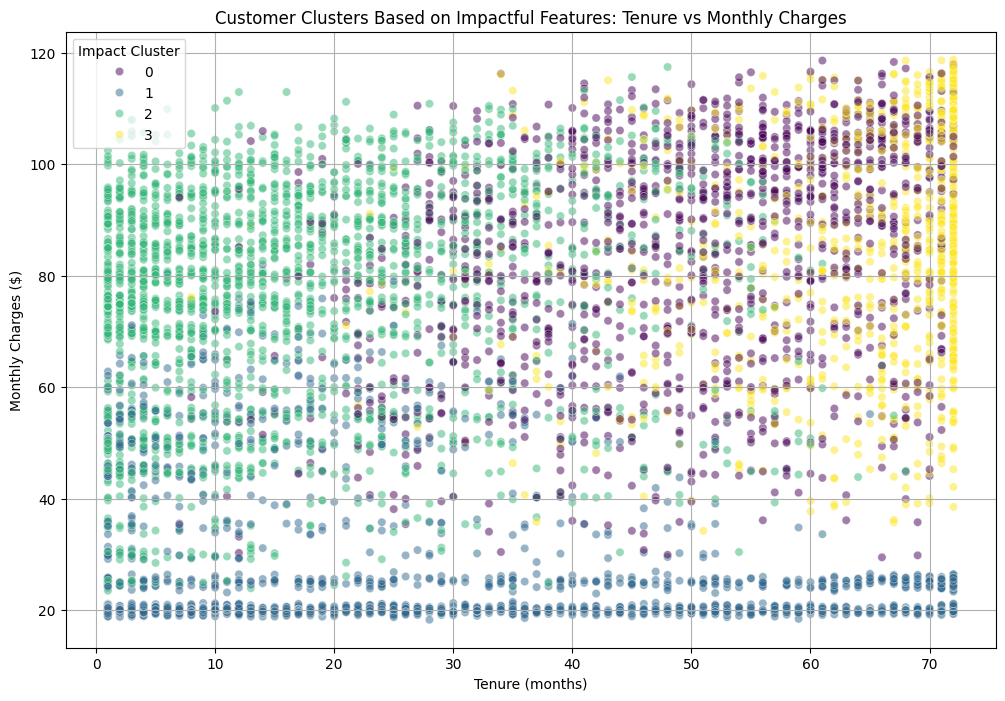

In [8]:

# One-hot encoding the categorical columns
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
df['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=df, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()


Cluster 0 (light green): This segment includes customers with medium to high monthly charges and a range of tenure lengths. They might be heavy users of services or prefer higher-tier offerings.

Cluster 1 (purple): Customers in this cluster have higher monthly charges and longer tenures, suggesting they are loyal customers who may use premium services.

Cluster 2 (yellow): This cluster consists of customers with lower monthly charges and shorter tenures, indicating they are likely new customers or are more price-sensitive.

Cluster 3 (blue): Encompassing customers with lower to medium monthly charges and a broad range of tenure lengths, this cluster may represent a mixed segment with stable, yet budget-conscious customers.

I will creat a chart based on the number of churned versus non-churned customers in each clusters.

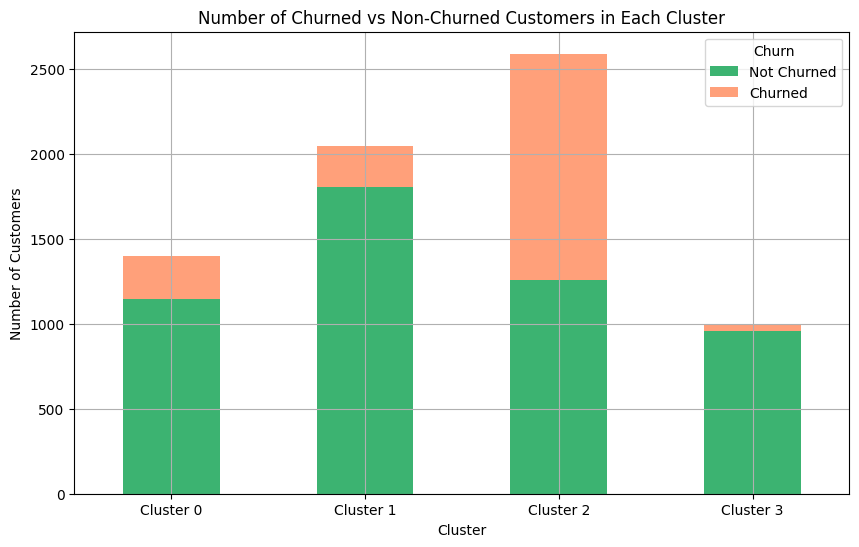

Churn,No,Yes
Impact_Cluster,,
0,1146,251
1,1803,244
2,1258,1331
3,956,43


In [12]:
# Counting churned and non-churned customers in each cluster
churn_counts = df.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)

# Plotting the churn counts
churn_counts.plot(kind='bar', stacked=True, color=['mediumseagreen', 'lightsalmon'], figsize=(10, 6))
plt.title('Number of Churned vs Non-Churned Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(True)
plt.show()

churn_counts


**Summary of Findings:**

**Correlation and Distribution Analyses:**
- Customers with fiber optic internet tend to churn more, possibly due to unmet expectations regarding quality or price.
- Month-to-month contracts show higher churn rates, indicating customers find it easier to switch providers without long-term commitments.
- Higher monthly charges are associated with increased churn, suggesting customers are sensitive to pricing and competitive offers.
- Shorter tenure strongly correlates with churn, indicating new customers are more likely to leave, possibly due to initial dissatisfaction or better offers elsewhere.

**Cluster Analysis:**
- Clustering based on important features (tenure, monthly and total charges, service types, and payment methods) revealed distinct customer segments.
- Cluster 0: Balanced churn and retention, suggesting mixed satisfaction levels or service experiences.
- Cluster 1: High retention, indicating satisfaction with services or pricing, making them valuable for long-term growth strategies.
- Clusters 2 and 3: Moderate to low churn, suggesting these segments experience fair satisfaction but could benefit from targeted improvements or loyalty programs.

These insights can help develop targeted strategies to reduce churn and enhance overall customer satisfaction.

It seems like month-to-month contracts, the absence of online security, and the lack of tech support are positively correlated with churn, meaning that customers with these characteristics are more likely to leave. On the other hand, longer tenure and opting for two-year contracts are negatively correlated with churn, indicating that customers with these characteristics are less likely to leave.

Interestingly, services like online security, streaming TV, online backup, and tech support, which can be accessed offline, seem to have a negative relationship with churn. This suggests that customers who use these services are less likely to churn.

The green slice in the visualization represents the 27% of customers who have left the company. Our goal is to analyze the characteristics of these customers to understand why they left and identify patterns that can help reduce churn in the future.

**Preprocessing Data**

In [9]:


categorical = df.select_dtypes("object")
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [11]:
number = df.select_dtypes("number").reset_index(drop=True)
cate = pd.DataFrame(encoded.astype("int64"),columns=categorical.columns).reset_index(drop=True)
df = pd.concat([number,cate],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Impact_Cluster,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,2,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


**Modeling Using XGBoost**

In our dataset, we encounter a class imbalance issue where some categories have significantly fewer examples than others. This imbalance can hinder the model's ability to learn effectively, as it might prioritize the majority class and overlook patterns in the minority class. To address this, we employ a technique called Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic examples for the minority class, making the dataset more balanced and enhancing the model's ability to learn from all classes.

After balancing the dataset, we split it into training and testing sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data. This step ensures that the model generalizes well to new data and has not simply memorized the training examples.

We choose the XGBoost Classifier for its effectiveness in handling imbalanced datasets and its ability to capture complex relationships in the data. XGBoost is an implementation of gradient boosting that has shown excellent performance in a wide range of classification tasks.

Finally, we perform hyperparameter tuning to optimize the model's performance. Hyperparameters are settings that control the learning process of the model, such as the learning rate, tree depth, and regularization parameters. By systematically exploring different combinations of hyperparameters, we can find the best configuration that maximizes the model's performance metrics, such as accuracy, precision, recall, and F1 score. This helps us ensure that our model is achieving the best possible performance for our specific dataset and problem.

In [12]:
# Split the dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values

# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  XGBoost classifier
xgb = XGBClassifier(verbosity=0)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}



# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_xgb.predict(X_test)




ROC-AUC Score: 0.8393530714393485


Let us calculate the performance metrics (accuracy, precision, recall, F1 score) for the XGBosst model 

In [18]:
# Evaluate the model
Y_pred_xgb = final_xgb.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(Y_test, Y_pred_xgb))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score:", roc_auc)


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC-AUC Score: 0.8761424944685136


**Modeling Using Neural Network**

For the Neural Network model, we use the Keras library to define a deep learning model. The model consists of three main parts:

1. **Input Layer**: This layer receives the input data. It is configured to match the number of input features in our dataset.

2. **Hidden Layer**: This layer processes the input data, extracting relevant features. We can specify the number of neurons in this layer and the activation function, which controls the output of each neuron.

3. **Output Layer**: This layer produces the final output of the model. Since we are dealing with a binary classification task (churn or no churn), the output layer uses a sigmoid activation function, which squashes the output to a range between 0 and 1, representing the probability of churn.

To optimize the performance of the Neural Network, we use a wrapper class called `KerasClassifierWrapper`. This class allows us to use scikit-learn's `GridSearchCV` for hyperparameter tuning. Hyperparameters are settings that are not learned by the model but affect its learning process. We tune the following hyperparameters:

1. **Number of Neurons**: The number of neurons in the hidden layer.
2. **Activation Function**: The function used to introduce non-linearity into the model. Common choices include 'relu' (rectified linear unit) and 'tanh' (hyperbolic tangent).
3. **Optimizer**: The algorithm used to update the weights of the neural network during training. Examples include 'adam' and 'rmsprop'.
4. **Learning Rate**: The rate at which the model learns from the data. It controls the size of the updates to the weights.

By tuning these hyperparameters, we aim to find the configuration that maximizes the model's performance on our dataset, as measured by metrics like accuracy, precision, recall, and F1 score. This process helps us build a Neural Network model that can effectively predict customer churn.

In [15]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test)



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Let us calculate the performance metrics (accuracy, precision, recall, F1 score) for Keras Neural Network model

In [17]:
Y_pred_nn = final_model.predict(X_test)
Y_pred_nn = (Y_pred_nn > 0.5).astype(int)
print("Keras Neural Network:")
print(classification_report(Y_test, Y_pred_nn))


roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for ANN Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Keras Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1037
           1       0.76      0.86      0.81      1029

    accuracy                           0.79      2066
   macro avg       0.80      0.80      0.79      2066
weighted avg       0.80      0.79      0.79      2066

ROC-AUC Score for ANN Model: 0.8761424944685136


**Modeling Using Recurrent Neural Network (RNN)**

For the RNN model, we follow these steps:

1. **Data Normalization**: We use min-max scaling to scale the input features to a range between 0 and 1. This ensures that all features contribute equally to the model training process.

2. **Reshaping Input Data**: RNNs expect input data in a specific shape (batch_size, timesteps, input_dim). We reshape the input data to fit this requirement, where 'batch_size' represents the number of samples in each batch, 'timesteps' is the number of time steps in each sample, and 'input_dim' is the number of features in each time step.

3. **Defining the RNN Model**: We define a Keras RNN model using the SimpleRNN layer. This layer is suitable for processing sequential data and includes a specified number of neurons and an activation function.

4. **Wrapper Class for GridSearchCV**: To use GridSearchCV for hyperparameter tuning, we implement a wrapper class called `KerasClassifierWrapper`. This class adapts the Keras RNN model to work with GridSearchCV, allowing us to tune hyperparameters such as the number of neurons, activation function, optimizer, and learning rate.

5. **Hyperparameter Tuning**: Using GridSearchCV, we search over a predefined grid of hyperparameters to find the best combination for our RNN model. Hyperparameters are settings that affect the learning process but are not learned from the data. By tuning these hyperparameters, we aim to optimize the model's performance on our dataset.

Overall, these steps help us build an RNN model that can effectively predict customer churn based on the provided dataset.

In [22]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize the input data
X_train_norm = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

# Reshape the input data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train_norm, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test_norm)
from sklearn.metrics import classification_report

# Assuming Y_test and Y_pred are the true labels and predicted labels, respectively, for your model
Y_pred_rnn = final_model.predict(X_test_norm)
Y_pred_rnn = (Y_pred_rnn > 0.5).astype(int)
print("RNN:")
print(classification_report(Y_test, Y_pred_rnn))


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [23]:
# Model Evaluation
Y_pred_rnn = final_model.predict(X_test_norm)
Y_pred_rnn = (Y_pred_rnn > 0.5).astype(int)
print("RNN:")
print(classification_report(Y_test, Y_pred_rnn))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for RNN Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RNN:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1037
           1       0.84      0.77      0.80      1029

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066

ROC-AUC Score for RNN Model: 0.8997008639521382


**Modeling Using Long Short-Term Memory (LSTM)**

For modeling using LSTM (Long Short-Term Memory) method, we follow a similar approach to the previous methods.

1. **Data Normalization**: We use min-max scaling to scale the input features to a range between 0 and 1, ensuring that all features contribute equally to the model training process.

2. **Reshaping Input Data**: LSTM models expect input data in a specific shape (batch_size, timesteps, input_dim). We reshape the input data to fit this requirement, where 'batch_size' represents the number of samples in each batch, 'timesteps' is the number of time steps in each sample, and 'input_dim' is the number of features in each time step.

3. **Defining the LSTM Model**: We define a Keras LSTM model with the LSTM layer. LSTM layers are well-suited for sequence prediction tasks due to their ability to retain information over long sequences. We specify the number of LSTM units (neurons) and an activation function for the layer.

4. **Wrapper Class for GridSearchCV**: Similar to the RNN approach, we implement a wrapper class called `KerasClassifierWrapper` to adapt the Keras LSTM model for use with GridSearchCV. This allows us to tune hyperparameters such as the number of LSTM units, activation function, optimizer, and learning rate.

5. **Hyperparameter Tuning**: Using GridSearchCV, we search over a predefined grid of hyperparameters to find the best combination for our LSTM model. Hyperparameters are settings that affect the learning process but are not learned from the data. By tuning these hyperparameters, we aim to optimize the model's performance on our dataset.

Overall, these steps help us build an LSTM model that can effectively predict customer churn based on the provided dataset.

In [24]:

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
# Ensure TensorFlow is running on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize input data
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
X_train_norm = (X_train - min_val) / (max_val - min_val)
X_test_norm = (X_test - min_val) / (max_val - min_val)

# Reshape data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the Keras model
def create_model(neurons=50, dropout_rate=0.2, activation='relu', optimizer='adam', learn_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learn_rate), metrics=['accuracy'])
    return model

# Wrapper class for Keras model to use with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, neurons, dropout_rate, activation, optimizer, learn_rate):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.activation = activation
        self.optimizer = optimizer
        self.learn_rate = learn_rate

    def fit(self, X, y, **fit_params):
        self.model = create_model(self.neurons, self.dropout_rate, self.activation, self.optimizer, self.learn_rate)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Setup for GridSearchCV
param_grid = {
    'neurons': [50, 100],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learn_rate': [0.001, 0.01]
}
grid_search = GridSearchCV(estimator=KerasClassifierWrapper(50, 0.1, 'relu', 'adam', 0.01), param_grid=param_grid,
                           scoring=make_scorer(roc_auc_score), cv=3, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train, epochs=10, batch_size=10, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Get the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the final model
final_model = create_model(**grid_result.best_params_)
final_model.fit(X_train_norm, Y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
Y_pred = final_model.predict(X_test_norm)



Please install GPU version of TF
Please install GPU version of TF


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.838987 using {'activation': 'tanh', 'dropout_rate': 0.1, 'learn_rate': 0.01, 'neurons': 100, 'optimizer': 'rmsprop'}
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [25]:
#Evaluatiing the LSTM model
Y_pred_lstm = final_model.predict(X_test_norm)
Y_pred_lstm = (Y_pred_lstm > 0.5).astype(int)
print("LSTM:")
print(classification_report(Y_test, Y_pred_lstm))

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for LSTM Model:", roc_auc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1037
           1       0.84      0.83      0.83      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC-AUC Score for LSTM Model: 0.9241125021437148


*Summary*

The project aimed to develop a predictive model to identify potential customer churn in a business. Several machine learning models were evaluated, including XGBoost Classifier, Keras Neural Network, Simple RNN, and LSTM, using a dataset that was preprocessed and balanced using SMOTE. 

The XGBoost Classifier achieved an accuracy of 0.84, with a precision, recall, and F1-score of 0.85, 0.83, and 0.84, respectively, for class 0, and 0.83, 0.85, and 0.84 for class 1. The ROC-AUC score was 0.8761.

The Keras Neural Network achieved an accuracy of 0.79, with a precision, recall, and F1-score of 0.84, 0.73, and 0.78, respectively, for class 0, and 0.76, 0.86, and 0.81 for class 1. The ROC-AUC score was also 0.8761.

The Simple RNN achieved an accuracy of 0.81, with a precision, recall, and F1-score of 0.79, 0.86, and 0.82, respectively, for class 0, and 0.84, 0.77, and 0.80 for class 1. The ROC-AUC score was 0.8997.

The LSTM achieved an accuracy of 0.84, with a precision, recall, and F1-score of 0.83, 0.84, and 0.84, respectively, for class 0, and 0.84, 0.83, and 0.83 for class 1. The ROC-AUC score was the highest at 0.9241.

Based on these results, the LSTM model was selected as the best-performing model for predicting customer churn. It demonstrated the highest ROC-AUC score and balanced performance across all evaluation metrics, making it the most suitable choice for the project.